a. Đọc bộ dữ liệu Iris từ sklearn

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

b. Khảo sát bộ dữ liệu Iris

In [4]:
#In ra tên các thuộc tính, thuộc tính phân lớp.

print("Attributes (Features):", iris.feature_names)

print("Class Labels (Target):", iris.target_names)

Attributes (Features): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class Labels (Target): ['setosa' 'versicolor' 'virginica']


In [5]:
#In ra số lượng mẫu, số lượng thuộc tính
print("Data shape:", iris.data.shape)
print("Target shape:", iris.target.shape)

Data shape: (150, 4)
Target shape: (150,)


In [6]:
#In ra 5 mẫu dữ liệu đầu tiên
print("First 5 samples of data (features) and target labels:")
for i in range(5):
    print(f"Sample {i + 1} - Features: {iris.data[i]}, Target: {iris.target[i]}")

First 5 samples of data (features) and target labels:
Sample 1 - Features: [5.1 3.5 1.4 0.2], Target: 0
Sample 2 - Features: [4.9 3.  1.4 0.2], Target: 0
Sample 3 - Features: [4.7 3.2 1.3 0.2], Target: 0
Sample 4 - Features: [4.6 3.1 1.5 0.2], Target: 0
Sample 5 - Features: [5.  3.6 1.4 0.2], Target: 0


In [7]:
#Thống kê count, mean, std, min, max, tứ vị phân của bộ dữ liệu
import pandas as pd
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Display statistical summary
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


c. Chuẩn hóa dữ liệu data về đoạn [0,1]

In [8]:
import numpy as np

X = iris.data  # Assign data to X
Y = iris.target  # Assign target to Y

# Divide each value in X by 100
X = X / np.max(X, axis = 0)

X

array([[0.64556962, 0.79545455, 0.20289855, 0.08      ],
       [0.62025316, 0.68181818, 0.20289855, 0.08      ],
       [0.59493671, 0.72727273, 0.1884058 , 0.08      ],
       [0.58227848, 0.70454545, 0.2173913 , 0.08      ],
       [0.63291139, 0.81818182, 0.20289855, 0.08      ],
       [0.6835443 , 0.88636364, 0.24637681, 0.16      ],
       [0.58227848, 0.77272727, 0.20289855, 0.12      ],
       [0.63291139, 0.77272727, 0.2173913 , 0.08      ],
       [0.55696203, 0.65909091, 0.20289855, 0.08      ],
       [0.62025316, 0.70454545, 0.2173913 , 0.04      ],
       [0.6835443 , 0.84090909, 0.2173913 , 0.08      ],
       [0.60759494, 0.77272727, 0.23188406, 0.08      ],
       [0.60759494, 0.68181818, 0.20289855, 0.04      ],
       [0.5443038 , 0.68181818, 0.15942029, 0.04      ],
       [0.73417722, 0.90909091, 0.17391304, 0.08      ],
       [0.72151899, 1.        , 0.2173913 , 0.16      ],
       [0.6835443 , 0.88636364, 0.1884058 , 0.16      ],
       [0.64556962, 0.79545455,

d. Chia dữ liệu thành tập train và tập test theo tỷ lệ 8:2

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (120, 4)
Test set size: (30, 4)


e. Sử dụng Cây quyết định để phân lớp

In [51]:
#Huấn luyện mô hình phân lớp trên tập train
from sklearn.tree import DecisionTreeClassifier
model_e = DecisionTreeClassifier(random_state=42)
model_e.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
#Dự đoán nhãn lớp cho tập test
y_pred = model_e.predict(X_test)

In [53]:
#Tính và in ra Accuracy của mô hình trên tập test
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình trên tập kiểm tra: {accuracy:.2f}")

Độ chính xác của mô hình trên tập kiểm tra: 1.00


In [16]:
#Tính và in ra Precision, Recall, F1-score của từng lớp và trung bình của mô hình trên tập test
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



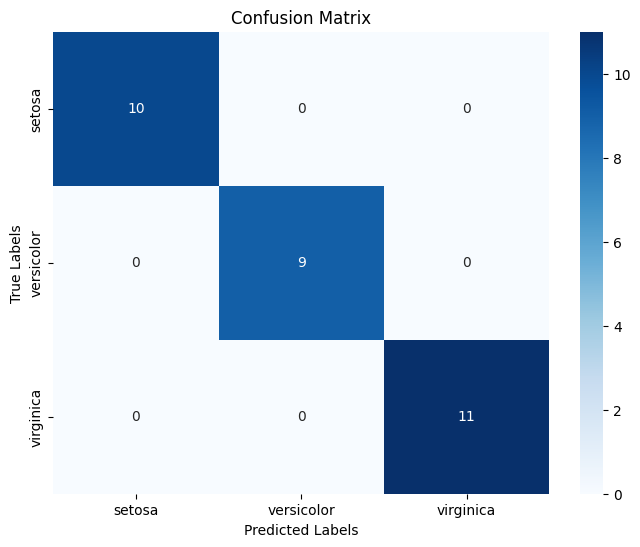

In [18]:
#Hiển thị confusion matrix bằng heat map (bản đồ nhiệt)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)

# Hiển thị confusion matrix dưới dạng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

f. Sử dụng Naïve Bayes để phân lớp

In [20]:
#Huấn luyện mô hình phân lớp trên tập train
from sklearn.naive_bayes import GaussianNB

model_f = GaussianNB()

# Huấn luyện mô hình trên tập huấn luyện
model_f.fit(X_train, y_train)

GaussianNB()

In [25]:
#Dự đoán nhãn lớp cho tập test
y_pred_f = model_f.predict(X_test)


In [26]:
#Độ chính xác
accuracy = accuracy_score(y_test, y_pred_f)
print(f"Độ chính xác của mô hình trên tập kiểm tra: {accuracy:.2f}")

Độ chính xác của mô hình trên tập kiểm tra: 1.00


In [29]:
#Tính và in ra Precision, Recall, F1-score của từng lớp và trung bình của mô hình trên tập test
print("Classification Report:")
print(classification_report(y_test, y_pred_f))

print(f"Accuracy: {accuracy_score(y_test, y_pred_f):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.00


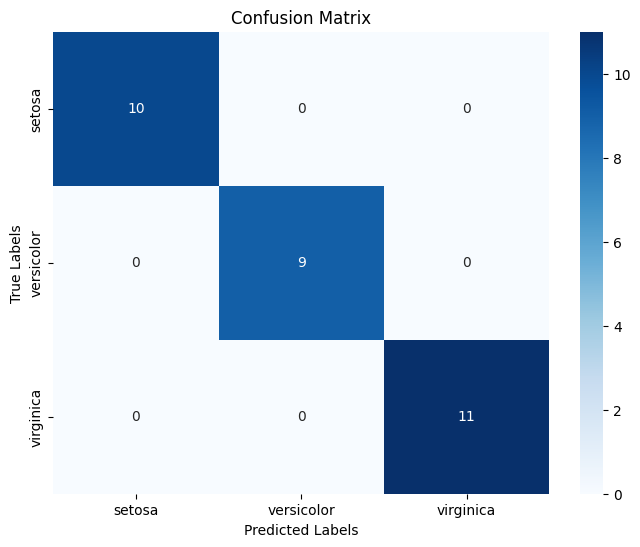

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred_f)

# Hiển thị confusion matrix dưới dạng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

g. Sử dụng K Nearest Neighbors Classizier để phân lớp

In [31]:
#Huấn luyện mô hình phân lớp trên tập train
from sklearn.neighbors import KNeighborsClassifier
model_g = KNeighborsClassifier(n_neighbors=5)

# Huấn luyện mô hình trên tập huấn luyện
model_g.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
#Dự đoán nhãn lớp cho tập test
y_pred_g = model_g.predict(X_test)

In [33]:
#Độ chính xác
accuracy = accuracy_score(y_test, y_pred_g)
print(f"Độ chính xác của mô hình trên tập kiểm tra: {accuracy:.2f}")

Độ chính xác của mô hình trên tập kiểm tra: 1.00


In [34]:
#Tính và in ra Precision, Recall, F1-score của từng lớp và trung bình của mô hình trên tập test
print("Classification Report:")
print(classification_report(y_test, y_pred_g))

print(f"Accuracy: {accuracy_score(y_test, y_pred_g):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.00


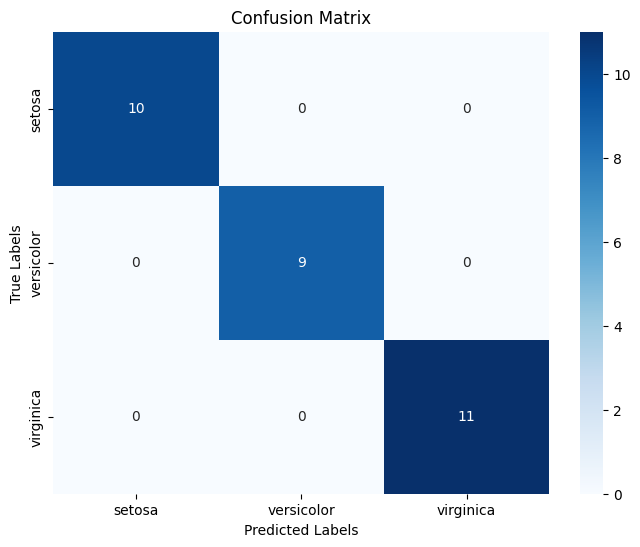

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred_g)

# Hiển thị confusion matrix dưới dạng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

h. Sử dụng Neural Network để phân lớp

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder

In [48]:
model_h = Sequential()

# Lớp ẩn đầu tiên (Hidden Layer 1)
model_h.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))

# Lớp ẩn thứ hai (Hidden Layer 2)
model_h.add(Dense(20, activation='relu'))

# Lớp đầu ra (Output Layer)
model_h.add(Dense(3, activation='softmax'))  # 3 lớp phân loại

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model_h.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
history = model_h.fit(X_train, y_train,
                    epochs=100,
                    batch_size=1,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3269 - loss: 1.0876 - val_accuracy: 0.5333 - val_loss: 1.0102
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6910 - loss: 0.9903 - val_accuracy: 0.7000 - val_loss: 0.9018
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7045 - loss: 0.8686 - val_accuracy: 0.8000 - val_loss: 0.7713
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7687 - loss: 0.7641 - val_accuracy: 0.9667 - val_loss: 0.6395
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9434 - loss: 0.6127 - val_accuracy: 0.8000 - val_loss: 0.5314
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8632 - loss: 0.5295 - val_accuracy: 0.9000 - val_loss: 0.4542
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9051 - loss: 0.4556 - val_accuracy: 1.0000 - val_loss: 0.4020
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9898 - loss: 0.3890 - val_accu

In [56]:
# Dự đoán nhãn lớp cho tập test
y_pred_prob = model_h.predict(X_test)  # Dự đoán xác suất cho từng lớp
y_pred = np.argmax(y_pred_prob, axis=1)  # Chọn lớp có xác suất lớn nhất

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [57]:
# Tính và in ra Accuracy trên tập test
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")


Accuracy on test set: 1.0000


In [46]:
# Tính và in ra Precision, Recall, F1-score của từng lớp và trung bình của mô hình trên tập test
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



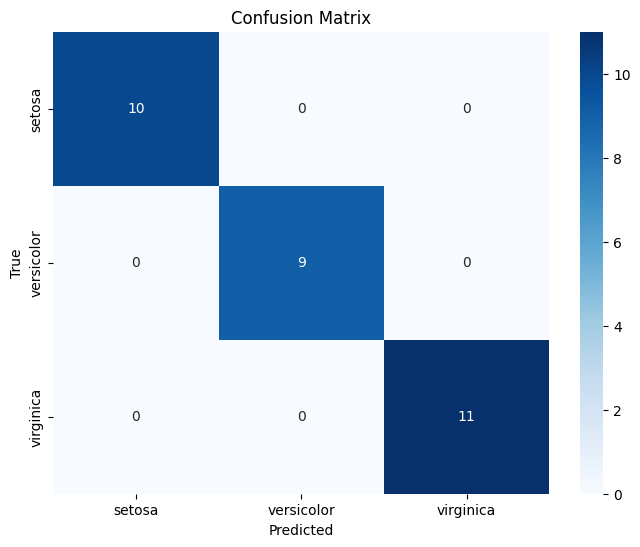

In [47]:
# Hiển thị Confusion Matrix bằng Heatmap
cm = confusion_matrix(y_test, y_pred)

# Vẽ heatmap cho confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

i. Sử dụng các mô hình phân lớp đã huấn luyện ở trên (câu e, f, g,h) cho 03
mẫu dữ liệu mới

In [55]:
# Mẫu dữ liệu mới (3 mẫu)
new_samples = np.array([[6.2, 2.9, 4.3, 1.3],
                        [5.1, 3.5, 1.4, 0.2],
                        [7.3, 2.8, 6.4, 2.1]])
new_samples = new_samples / np.max(iris.data, axis = 0)

# Dự đoán từ Decision Tree
decision_tree_predictions = model_e.predict(new_samples)
print("Decision Tree Predictions:", decision_tree_predictions)

# Dự đoán từ Naïve Bayes
naive_bayes_predictions = model_f.predict(new_samples)
print("Naïve Bayes Predictions:", naive_bayes_predictions)

# Dự đoán từ K Nearest Neighbors
knn_predictions = model_g.predict(new_samples)
print("K Nearest Neighbors Predictions:", knn_predictions)

# Dự đoán từ Neural Network
neural_network_predictions = model_h.predict(new_samples)
# Vì Neural Network trả về xác suất, ta cần dùng argmax để lấy nhãn lớp
neural_network_class_predictions = np.argmax(neural_network_predictions, axis=1)
print("Neural Network Predictions:", neural_network_class_predictions)

Decision Tree Predictions: [1 0 2]
Naïve Bayes Predictions: [1 0 2]
K Nearest Neighbors Predictions: [1 0 2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Neural Network Predictions: [1 0 2]


j. Nhận xét, đánh giá hiệu suất của các mô hình đã huấn luyện:
- Cả 4 mô hình đều dự đoán ra các nhãn giống nhau.
- Trên 3 lớp cả 4 mô hình đều có accuracy, f1-score cao, đều bằng 1.0